In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [69]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tamaño de la imagen
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Generadores para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(rescale=1./255)  # Escalado de imágenes
train_data_gen = train_datagen.flow_from_directory(
    'cats_and_dogs/train',  # Ruta de imágenes de entrenamiento
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Cambiar tamaño de las imágenes
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Usamos clasificación binaria (gato o perro)
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_data_gen = validation_datagen.flow_from_directory(
    'cats_and_dogs/validation',  # Ruta de imágenes de validación
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_gen = test_datagen.flow_from_directory(
    'cats_and_dogs/test',  # Ruta de imágenes de prueba
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,  # Para pruebas, generalmente usamos un tamaño de batch de 1
    class_mode=None,  # No necesitamos las etiquetas aquí, solo predicciones
    shuffle=False  # No mezclar las imágenes para que las predicciones se alineen con los resultados
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


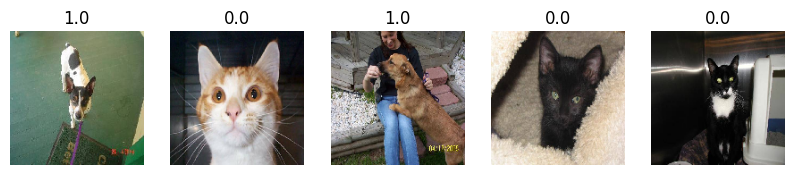

In [70]:
# 4
import matplotlib.pyplot as plt

def plot_images(images, labels=None, probabilities=None):
    plt.figure(figsize=(10,10))
    for i in range(5):  # Mostrar 5 imágenes
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        if labels is not None:
            plt.title(labels[i])
        if probabilities is not None:
            plt.title(f"{probabilities[i]*100:.2f}%")
    plt.show()

# Mostrar imágenes aleatorias de entrenamiento
images, labels = next(train_data_gen)  # Cargar un batch
plot_images(images, labels)



In [71]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=40,  # Rotaciones aleatorias
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2,  # Desplazamiento vertical
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest'  # Modo de relleno para las nuevas áreas
)

train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)



Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


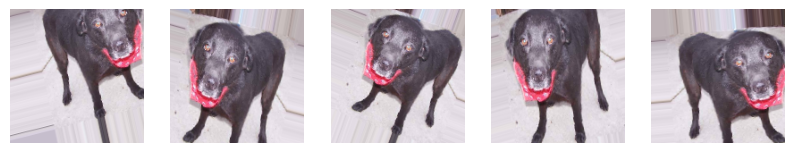

In [74]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Change 'plotImages' to 'plot_images' to match the function definition in cell #4
plot_images(augmented_images) # Call the function with the correct name

In [75]:
# 7
from tensorflow.keras import layers, models

model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa de aplanamiento y capa densa
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Salida binaria (gato o perro)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6588 - loss: 0.6270 - val_accuracy: 0.6603 - val_loss: 0.5996
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6886 - loss: 0.5985 - val_accuracy: 0.6885 - val_loss: 0.5773
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6948 - loss: 0.5808 - val_accuracy: 0.6875 - val_loss: 0.5673
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7023 - loss: 0.5870 - val_accuracy: 0.7137 - val_loss: 0.5601
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6836 - loss: 0.5874 - val_accuracy: 0.6905 - val_loss: 0.5687
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7178 - loss: 0.5551 - val_accuracy: 0.7278 - val_loss: 0.5362
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7206 - loss: 0.5474 - val_accuracy: 0.7288 - val_loss: 0.5366
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6963 - loss: 0.5690 - val_accuracy: 0.7208 - v

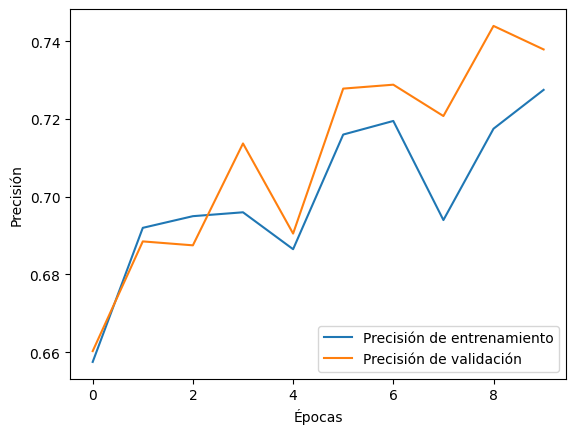

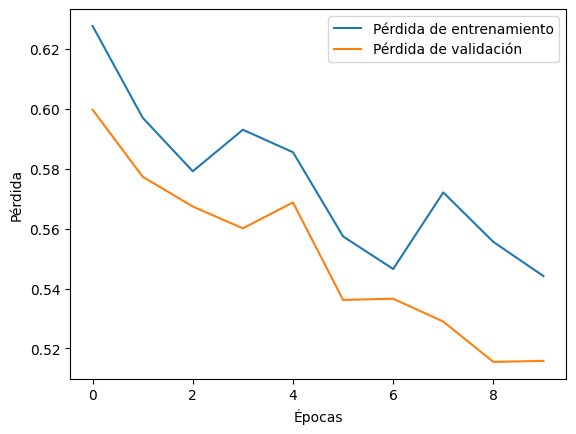

In [78]:
# 9
# Graficar precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [84]:
#10
# Reset the test_data_gen before prediction
test_data_gen.reset()

probabilities = model.predict(test_data_gen, steps=test_data_gen.samples // 1)

# Mostrar las imágenes con probabilidades
# Reset the test_data_gen again before getting the next batch
test_data_gen.reset()
images, _ = next(test_data_gen)  # Cargar un batch
plot_images(images, probabilities=probabilities)


ValueError: The PyDataset has length 0

In [85]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

NameError: name 'probabilities' is not defined